In [116]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [117]:
df1 = pd.read_csv('s3://adfc-bike-census/adfc_data/Heidelberg_1.csv')
df1['date'] = pd.to_datetime(df1['date'])
df2 = pd.read_csv('s3://adfc-bike-census/adfc_data/Heidelberg_2.csv')
df2['date'] = pd.to_datetime(df2['date'])

In [118]:
df1['station_id'] = 1
df2['station_id'] = 2
dfc = pd.concat([df1, df2])

In [119]:
type(dfc['date'].max())

pandas._libs.tslibs.timestamps.Timestamp

In [120]:
dfc.set_index('date', inplace=True)
df1.set_index('date', inplace=True)
df2.set_index('date', inplace=True)
dfc.head()

,Unnamed: 0,comptage,timestamp,station_id
date,,,,
2016-01-01 00:00:00,0,0,1451606400000,1
2016-01-01 00:15:00,1,4,1451607300000,1
2016-01-01 00:30:00,2,7,1451608200000,1
2016-01-01 00:45:00,3,5,1451609100000,1
2016-01-01 01:00:00,4,2,1451610000000,1


In [121]:
dfc.loc['2019']

,Unnamed: 0,comptage,timestamp,station_id
date,,,,
2019-01-01 00:00:00,105204,5,1546300800000,1
2019-01-01 00:15:00,105205,0,1546301700000,1
2019-01-01 00:30:00,105206,6,1546302600000,1
2019-01-01 00:45:00,105207,6,1546303500000,1
2019-01-01 01:00:00,105208,5,1546304400000,1
...,...,...,...,...
2019-12-31 22:45:00,140235,3,1577832300000,2
2019-12-31 23:00:00,140236,2,1577833200000,2
2019-12-31 23:15:00,140237,2,1577834100000,2


In [122]:
dfc.loc['2019-01-01'].query('station_id == 1')['comptage'].sum()

650

In [123]:
dfc.loc['2019-01-01'].query('station_id == 2')['comptage'].sum()

373

In [124]:
days_summarized = dfc['comptage'].resample('D').sum()
days_summarized['2019-01-01']

1023

In [125]:
def summarize(df, scale):
    return df['comptage'].resample(scale).sum()

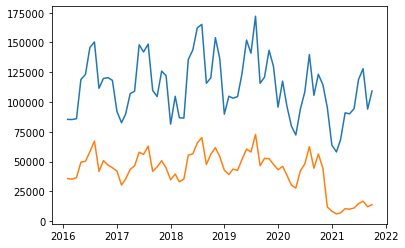

In [127]:
plt.plot(summarize(df1, 'M'))
plt.plot(summarize(df2, 'M'))
plt.show()

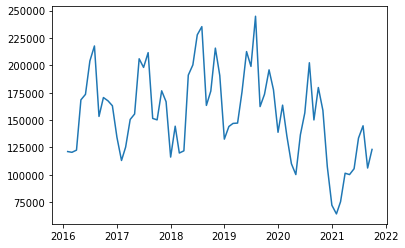

In [128]:
plt.plot(summarize(dfc, 'M'))
plt.show()